# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your model using train-test-split.


## Objectives

You will be able to:

- Calculate the mean squared error (MSE) as a measure of predictive performance
- Validate the model using the test data


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features["B"]
logdis = np.log(boston_features["DIS"])
loglstat = np.log(boston_features["LSTAT"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [37]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = boston.target

## Perform a train-test-split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [40]:
print(len(x_train), len(y_train), len(x_test), len(y_test))


404 404 102 102


## Apply your model to the train set

#### Importing and initializing the model class

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
linreg = LinearRegression()

#### Fitting the model to the train data

In [43]:
result = linreg.fit(x_train, y_train)

In [44]:
result.coef_

array([ 2.14553916,  3.88475901, -6.12849634,  5.08828644, -6.08034128])

#### Calculating predictions on the train set, and on the test set

In [45]:
y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)

#### Calculating your residuals

In [46]:
train_res = y_hat_train - y_train
test_res = y_hat_test - y_test

#### Calculating the Mean Squared Error
A good way to compare overall performance is to compare the mean squarred error for the predicted values on the train and test sets.

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
mean_squared_error(y_train, y_hat_train)

21.49253515277319

In [49]:
mean_squared_error(y_test, y_hat_test)

23.25039431863885

If your test error is substantially worse then our train error, this is a sign that our model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train test split. By default, scikit learn's built in method allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluating the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

In [50]:
training_error = []
testing_error = []
for i in np.linspace(0.1,0.99,50):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = i)
    linreg = LinearRegression()
    result = linreg.fit(x_train, y_train)
    y_hat_train = linreg.predict(x_train)
    y_hat_test = linreg.predict(x_test)
    training_error.append(mean_squared_error(y_train, y_hat_train))
    testing_error.append(mean_squared_error(y_test, y_hat_test))
    print(f'when test size is {i}')
    print(f'train MSR is {mean_squared_error(y_train, y_hat_train)}')
    print(f'test MSR is {mean_squared_error(y_test, y_hat_test)}')
    print('--------------')
    

when test size is 0.1
train MSR is 20.163485886464954
test MSR is 36.74196538472554
--------------
when test size is 0.11816326530612245
train MSR is 22.017718805849018
test MSR is 19.948712514566306
--------------
when test size is 0.1363265306122449
train MSR is 21.54498234820618
test MSR is 23.012523860146896
--------------
when test size is 0.15448979591836737
train MSR is 21.75777520963088
test MSR is 21.734424205295753
--------------
when test size is 0.1726530612244898
train MSR is 19.356562825523383
test MSR is 33.17762390079607
--------------
when test size is 0.19081632653061226
train MSR is 21.81527396167935
test MSR is 21.83765142247958
--------------
when test size is 0.2089795918367347
train MSR is 22.42377045328564
test MSR is 19.61021792626785
--------------
when test size is 0.22714285714285715
train MSR is 22.36713744471864
test MSR is 19.783086252227246
--------------
when test size is 0.2453061224489796
train MSR is 22.9992635658974
test MSR is 17.95204648809158
---

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(training_error, testing_error)

# Evaluating the effect of train-test split size: extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

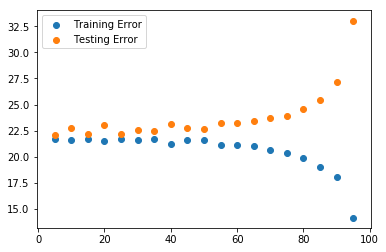

What's happening here? evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge on MSE and on using train-test-split.